In [1]:
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Declaring Global Parameters

In [2]:
a = 15 # FORS Tree Height
# k = 10 # FORS Tree Number
val_arr = []

In [3]:
parameters = {
    "128S" : {
        "n":16,
        "h":66,
        "d":11,
        "k":9,
        "w":128,
        "a":13
    },
    "128F" : {
        "n":16,
        "h":63,
        "d":21,
        "k":19,
        "w":16,
        "a":9
    },
    "192S" : {
        "n":24,
        "h":63,
        "d":11,
        "k":13,
        "w":128,
        "a":15
    },
    "192F" : {
        "n":24,
        "h":63,
        "d":21,
        "k":30,
        "w":16,
        "a":9
    },
    "256S" : {
        "n":32,
        "h":66,
        "d":11,
        "k":19,
        "w":64,
        "a":14
    },
    "256F" : {
        "n":32,
        "h":64,
        "d":16,
        "k":34,
        "w":16,
        "a":10
    },
}

m = b"No one knows the reason for all this, but it is probably quantum. - Pyramids, Terry Pratchett (1989)"

# SPHINCS+ 

In [4]:
from package.sphincs_old import Sphincs

In [5]:
def SphincsUtil(n, h, d, w, a, k, name):
    sphincsc = Sphincs()
    di= {}
    sphincsc.set_n(n)
    sphincsc.set_h(h)
    sphincsc.set_d(d)
    sphincsc.set_w(w)
    sphincsc.set_a(a)
    sphincsc.set_k(k)
    
    start = time.time()
    sk, pk = sphincsc.generate_key_pair()
    end = time.time()
    key_gen_time = end-start
    print("Secret Key Size: ", len(sk))
    print("Public Key Size: ", len(pk))
    print("Time Taken to Generate Keys", key_gen_time)
    di["SK Size"] = len(sk) 
    di["PK Size"] = len(pk)
    di["Key Gen Time"]  = key_gen_time

    try:
    
        start = time.time()
        signature = sphincsc.sign(m, sk)
        end = time.time()
        sign_time = end-start
        print("Time Taken to Sign", sign_time)
        print("Signature Size", len(signature), "bytes")

        start = time.time()
        verify_true = sphincsc.verify(m, signature, pk)
        end = time.time()
        verify_time = end-start
        print("Time Taken to Verify", verify_time)
        print("Is signature correct ? ", verify_true)

        di["Sign Size"] = len(signature)
        di["Sign Time"] = sign_time
        di["Verify Time"] = verify_time
        
    except:
        
        print(name + " Failed")
    
    print("-"*50, "\n")

    return di


## SPHINCS+128S

In [6]:
parameter_names = list(parameters.keys())

for param_set in parameter_names:
    print(param_set)
    param = parameters[param_set]
    d = SphincsUtil(**param, name = param_set)
    d["Name"] = param_set
    val_arr.append(d)
    print("-"*50, "\n")
    

128S
Secret Key Size:  64
Public Key Size:  32
Time Taken to Generate Keys 0.2567863464355469
Time Taken to Sign 3.3916401863098145
Signature Size 9248 bytes
Time Taken to Verify 0.0176546573638916
Is signature correct ?  True
-------------------------------------------------- 

-------------------------------------------------- 

128F
Secret Key Size:  64
Public Key Size:  32
Time Taken to Generate Keys 0.020987272262573242
Time Taken to Sign 0.6039059162139893
Signature Size 15824 bytes
Time Taken to Verify 0.02141714096069336
Is signature correct ?  True
-------------------------------------------------- 

-------------------------------------------------- 

192S
Secret Key Size:  96
Public Key Size:  48
Time Taken to Generate Keys 0.10773634910583496
Time Taken to Sign 12.963031530380249
Signature Size 19800 bytes
Time Taken to Verify 0.02306818962097168
Is signature correct ?  False
-------------------------------------------------- 

----------------------------------------------

In [7]:
df = pd.DataFrame(val_arr)

In [8]:
df.to_csv("result-SHA512.csv", encoding='utf-8', index=False)

In [9]:
df.head(len(val_arr))

,SK Size,PK Size,Key Gen Time,Sign Size,Sign Time,Verify Time,Name
0,64,32,0.256786,9248,3.391640,0.017655,128S
1,64,32,0.020987,15824,0.603906,0.021417,128F
2,96,48,0.107736,19800,12.963032,0.023068,192S
3,96,48,0.029592,34440,0.967812,0.031571,192F
4,128,64,0.336793,34848,11.002079,0.027867,256S
5,128,64,0.063930,48352,2.032680,0.034904,256F


In [10]:
df = df.round(3) 

In [11]:
def plot_bar_multi_columns(data, x_col, y_cols, y_label, colormap='viridis'):
    """
    Create a bar plot for multiple columns in a Pandas DataFrame with a gap between groups.

    Parameters:
    - data: The DataFrame containing the data to be plotted.
    - x_col: The name of the column to be used as the X-axis.
    - y_cols: A list of column names to be used as Y-axes.
    """
    # Extract X and Y data from the DataFrame
    x_data = data[x_col]
    y_data = data[y_cols]

    # Number of bars (Y-axes)
    num_y_axes = len(y_cols)

    # Set up the figure and axis with a larger figsize
    fig, ax = plt.subplots(figsize=(16, 10))

    # Width of each group of bars
    group_width = 1
    bar_width = (group_width / num_y_axes)-0.2

    # Define color options for bars
    colors = ['g', 'y', 'm', 'b', 'r', 'c', 'k']

    # Loop through each Y-axis and create a bar for each
    for i in range(num_y_axes):
        x_positions = [x + i * bar_width for x in range(len(x_data))]
        y_values = y_data[y_cols[i]]
        color = colors[i % len(colors)]  # Cycle through colors

        ax.bar(x_positions, y_values, width=bar_width, label=y_cols[i], color=color)

        # Add annotations to the bars
        for x, y in zip(x_positions, y_values):
            ax.text((x + bar_width / 2)-0.4, y, str(y), ha='center', va='bottom')

    # Set the X-axis labels and legend
    ax.set_xticks([(x + (group_width / 2))-0.5 for x in range(len(x_data))])
    ax.set_xticklabels(x_data, rotation=90, va='top')
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_label)
    ax.legend()


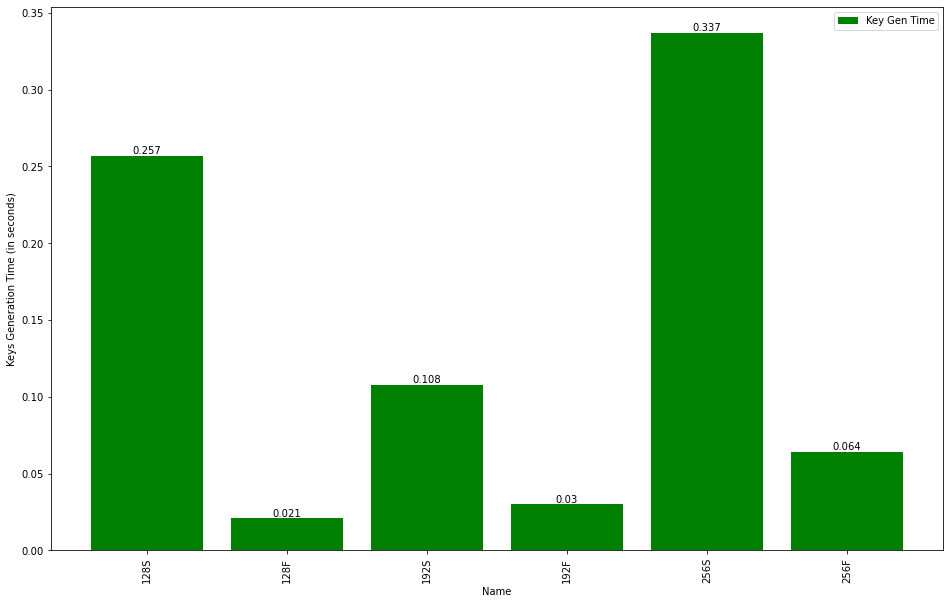

In [12]:
plot_bar_multi_columns(df, 'Name', ["Key Gen Time"], "Keys Generation Time (in seconds)", 'hsv')

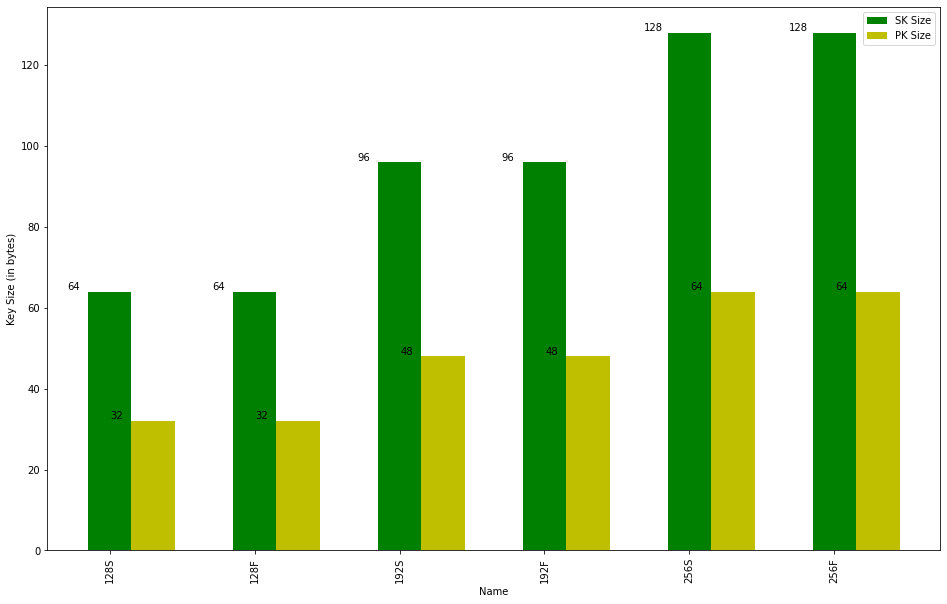

In [13]:
plot_bar_multi_columns(df, 'Name', ["SK Size","PK Size"], "Key Size (in bytes)")

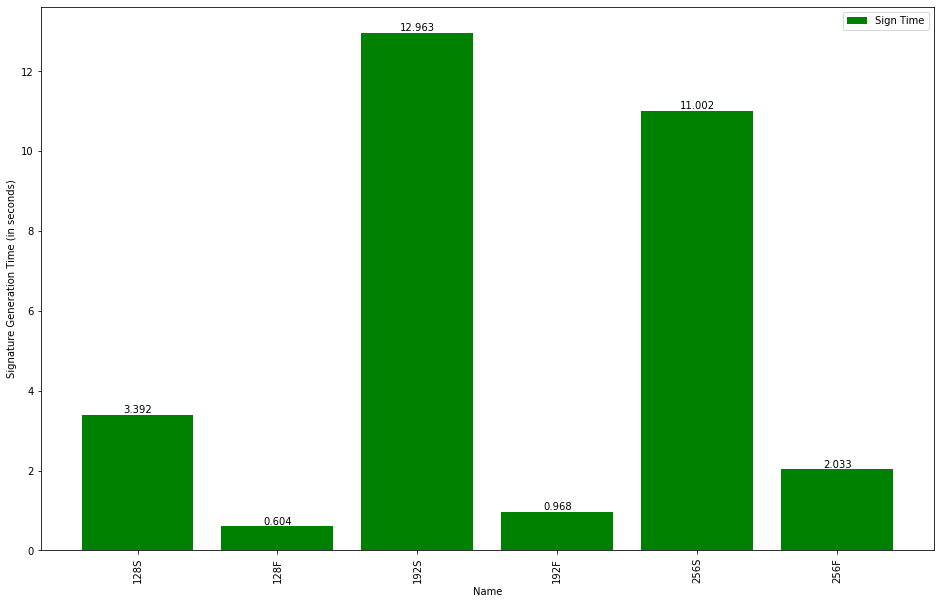

In [14]:
plot_bar_multi_columns(df, 'Name', ["Sign Time"], "Signature Generation Time (in seconds)")

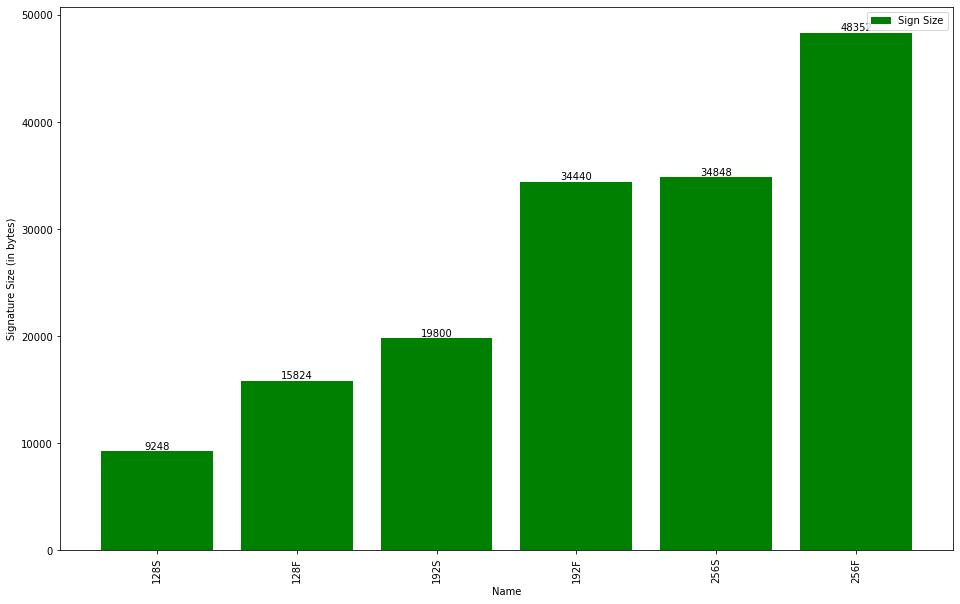

In [15]:
plot_bar_multi_columns(df, 'Name', ["Sign Size"], "Signature Size (in bytes)")

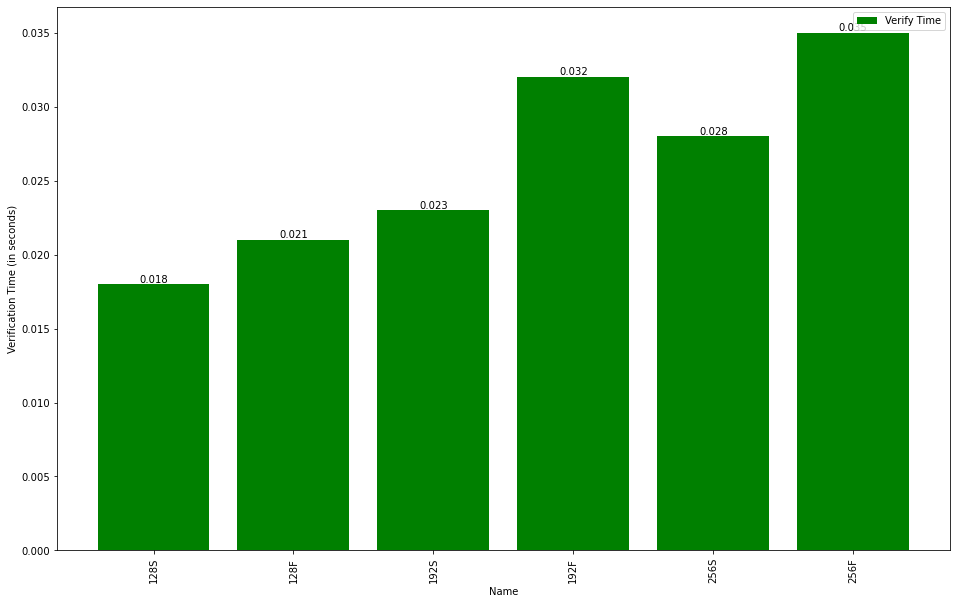

In [16]:
plot_bar_multi_columns(df, 'Name', ["Verify Time"], "Verification Time (in seconds)")

In [17]:
df2 = df.sort_values(by=['Sign Size'])

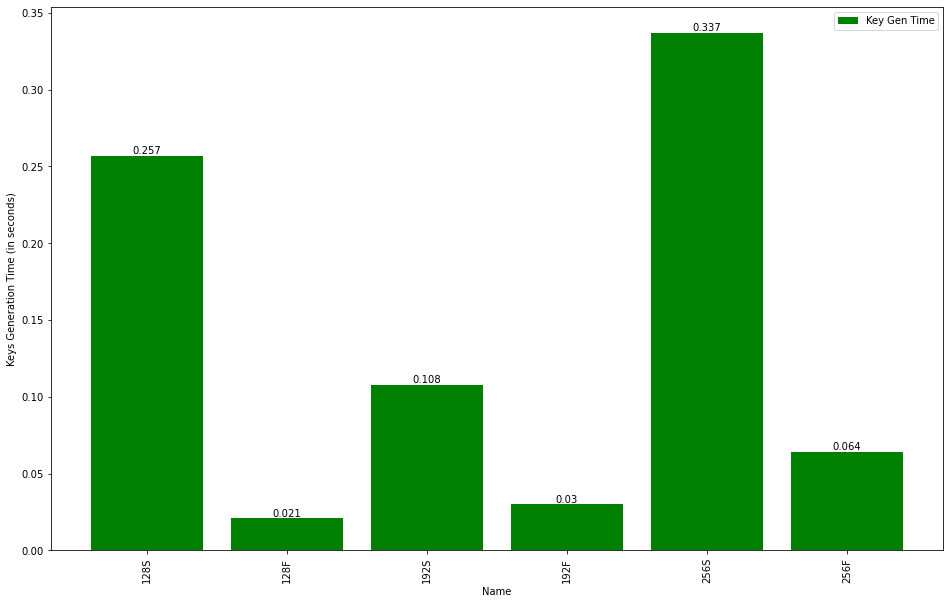

In [18]:
plot_bar_multi_columns(df2, 'Name', ["Key Gen Time"], "Keys Generation Time (in seconds)", 'hsv')

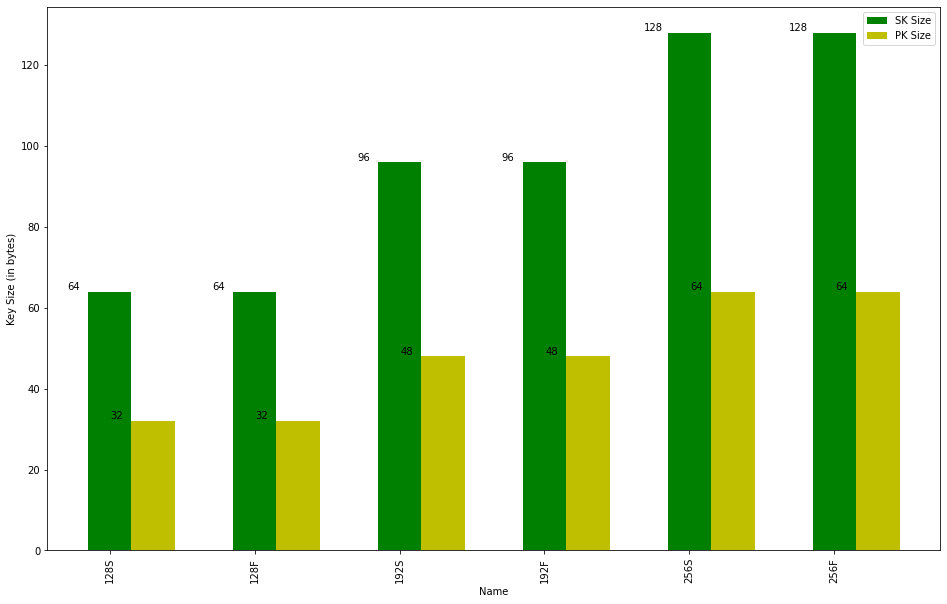

In [19]:
plot_bar_multi_columns(df2, 'Name', ["SK Size","PK Size"], "Key Size (in bytes)")

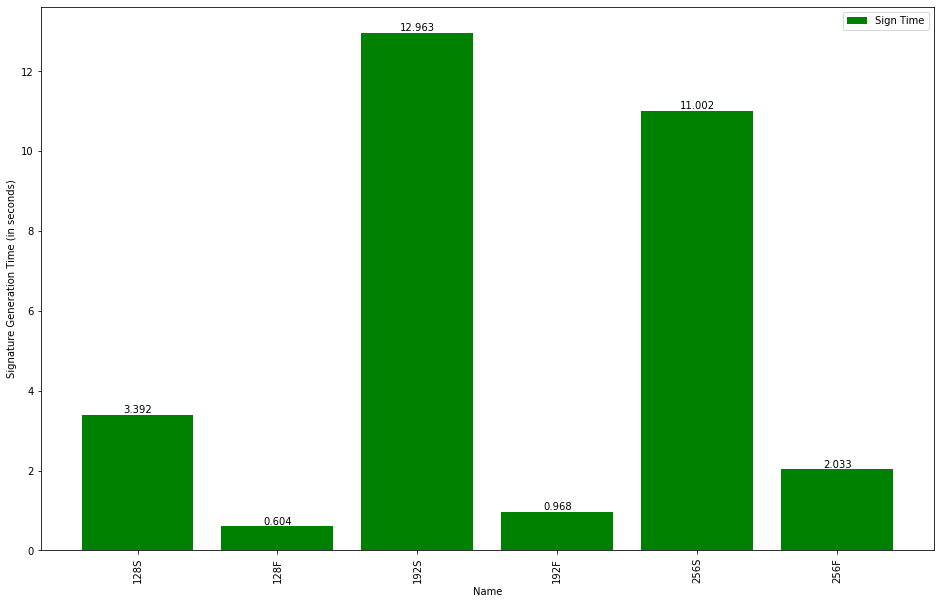

In [20]:
plot_bar_multi_columns(df2, 'Name', ["Sign Time"], "Signature Generation Time (in seconds)")

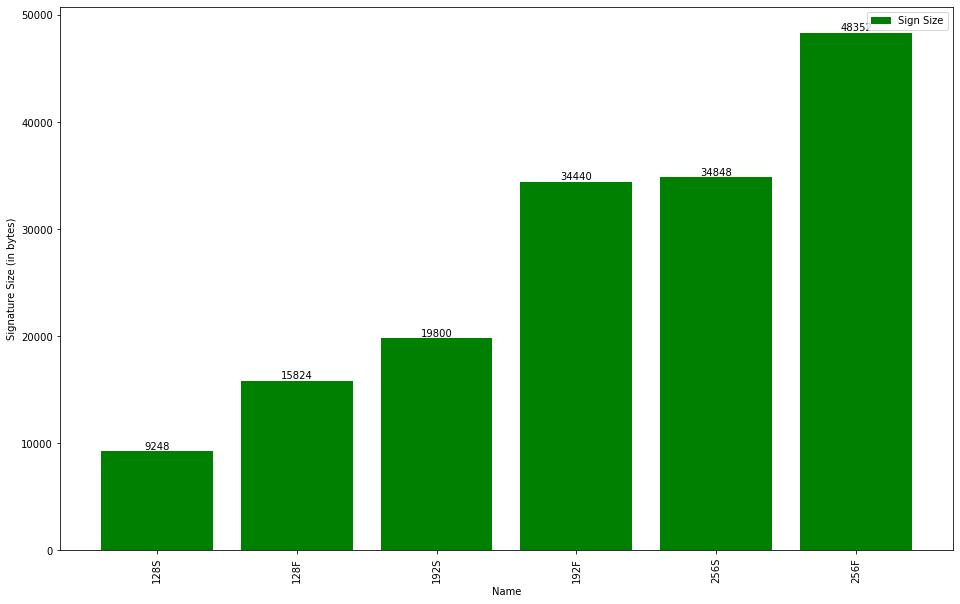

In [21]:
plot_bar_multi_columns(df2, 'Name', ["Sign Size"], "Signature Size (in bytes)")

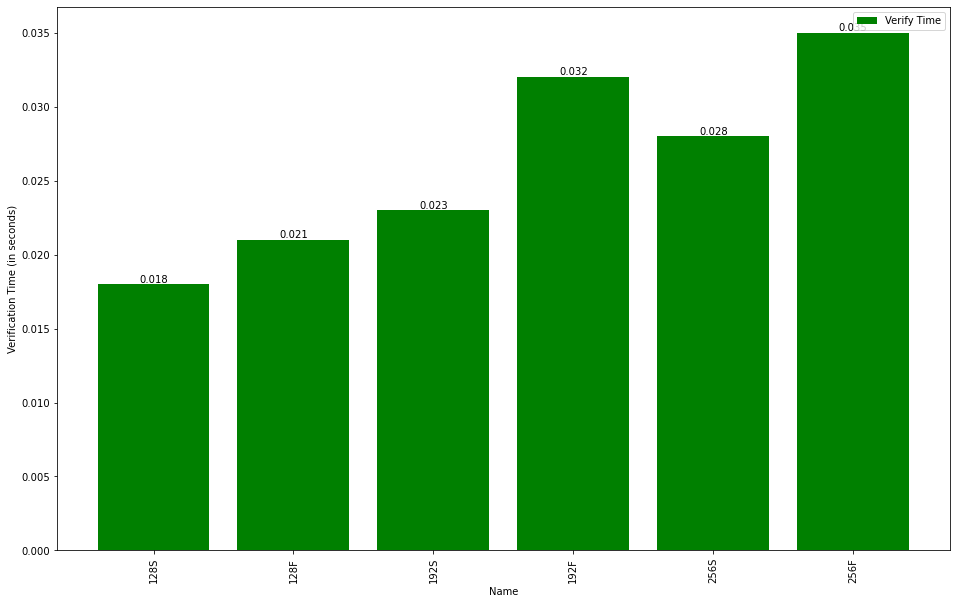

In [22]:
plot_bar_multi_columns(df2, 'Name', ["Verify Time"], "Verification Time (in seconds)")